In [1]:
import pandas as pd 
import datetime
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("NAD_12_2021-22_01MAR2022.xls", sheet_name="QTR curr")
df.head(10)

,"प्रचलित भावों पर सकल देशीय उत्पाद का त्रैमासिक अनुमान, 2011-12 श्रंखला",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,"QUARTERLY ESTIMATES OF GDP AT CURRENT PRICES, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,(` करोड़ में) (Rupees in crore),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,मद,2011-12,NaN,NaN,NaN,2012-13,NaN,NaN,NaN,2013-14,...,NaN,NaN,2020-21,NaN,NaN,NaN,2021-22,NaN,NaN,Item
5,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,...,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,NaN
6,बुनियादी मूल्यों पर सकल मूल्य वर्धन,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GVA at basic prices from
7,"1. कृषि, वानिकी, एवं मत्स्य पालन",323221.716367,270231.382145,505545.338931,402948.88451,360094.45973,302960.792111,557596.768357,454454.482687,407712.546003,...,13.32048,12.886478,6.21264,8.542024,8.780164,6.178859,9.774628,7.549551,9.672722,"1. Agriculture, forestry & fishing"
8,2. खनन एवं उत्खनन,64670.249371,55462.632148,65815.176712,75087.310791,75789.467127,59898.655246,70446.721063,79707.164631,70645.481117,...,-9.997034,-2.224853,-30.879783,-10.87221,-8.266069,10.10958,66.137713,54.658622,62.478256,2. Mining & quarrying
9,3. विनिर्माण,350857.054299,329936.530297,334726.673688,394465.312721,374606.430855,395938.880774,377768.415458,424523.16942,413130.914005,...,-5.223313,-5.406424,-33.075149,4.073599,9.429644,19.860575,65.12324,18.042437,12.399224,3. Manufacturing


In [4]:
dates = df.iloc[4]
date  = [x for x in dates[1:43]  if not pd.isnull(x)]
date

['2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21',
 '2021-22']

In [5]:
dateQlist = []
for i in date:
    for j in range(1,5):
        dateQlist.append(i+"Q"+str(j))
dateQlist.remove('2021-22Q4')
print(dateQlist)

['2011-12Q1', '2011-12Q2', '2011-12Q3', '2011-12Q4', '2012-13Q1', '2012-13Q2', '2012-13Q3', '2012-13Q4', '2013-14Q1', '2013-14Q2', '2013-14Q3', '2013-14Q4', '2014-15Q1', '2014-15Q2', '2014-15Q3', '2014-15Q4', '2015-16Q1', '2015-16Q2', '2015-16Q3', '2015-16Q4', '2016-17Q1', '2016-17Q2', '2016-17Q3', '2016-17Q4', '2017-18Q1', '2017-18Q2', '2017-18Q3', '2017-18Q4', '2018-19Q1', '2018-19Q2', '2018-19Q3', '2018-19Q4', '2019-20Q1', '2019-20Q2', '2019-20Q3', '2019-20Q4', '2020-21Q1', '2020-21Q2', '2020-21Q3', '2020-21Q4', '2021-22Q1', '2021-22Q2', '2021-22Q3']


In [6]:

data= {"Date":dateQlist}
df_new = pd.DataFrame(data)
#df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new = df_new.set_index('Date')
df_new = df_new.sort_values(by='Date')
df_new.head()

""
Date
2011-12Q1
2011-12Q2
2011-12Q3
2011-12Q4
2012-13Q1


In [7]:
for i in range(7,15):
    new_col =df.iloc[i]
    #print(new_col)
    res = [round(pd.to_numeric(x),2) for x in new_col[1:44]]
    print(res)
    col_name = new_col[87]
    print(col_name[2:])
    df_new[col_name[2:]] = res

[323221.72, 270231.38, 505545.34, 402948.88, 360094.46, 302960.79, 557596.77, 454454.48, 407712.55, 350835.2, 670113.18, 497710.94, 460964.43, 404350.0, 688922.91, 539374.22, 499370.09, 424241.24, 721066.22, 582855.32, 573091.66, 485561.87, 801318.3, 658690.2, 620726.62, 551157.19, 914936.58, 743005.46, 686739.32, 591790.48, 957922.19, 793473.05, 736647.29, 640470.64, 1085522.02, 895723.78, 782412.53, 695179.79, 1180832.63, 951069.29, 858890.44, 747662.74, 1295051.29]
 Agriculture, forestry & fishing
[64670.25, 55462.63, 65815.18, 75087.31, 75789.47, 59898.66, 70446.72, 79707.16, 70645.48, 63145.1, 74589.2, 87414.56, 95040.28, 68894.15, 72719.59, 71822.03, 90269.16, 61138.12, 68977.19, 73626.69, 81934.46, 60517.91, 76935.01, 107420.53, 82157.28, 67314.83, 82691.56, 103945.46, 94249.68, 79982.98, 95524.7, 107903.72, 94643.24, 72395.94, 85975.06, 105503.02, 65417.61, 64524.9, 78868.31, 116168.93, 108683.33, 99793.33, 128143.85]
 Mining & quarrying
[350857.05, 329936.53, 334726.67, 394465

In [8]:
df_new.head()

,"Agriculture, forestry & fishing",Mining & quarrying,Manufacturing,"Electricity, gas ,water supply& other utility services",Construction,"Trade, hotels, transport, communication and services related to broadcasting","Financial, real estate & professional services","Public administration, defence and Other Services"
Date,,,,,,,,
2011-12Q1,323221.72,64670.25,350857.05,44661.97,182218.75,330069.72,395102.00,225668.84
2011-12Q2,270231.38,55462.63,329936.53,46631.13,189095.78,337631.45,407657.04,263656.97
2011-12Q3,505545.34,65815.18,334726.67,47957.24,197079.15,351579.17,343064.87,245398.66
2011-12Q4,402948.88,75087.31,394465.31,47417.66,208940.87,393835.72,385053.47,291257.28
2012-13Q1,360094.46,75789.47,374606.43,54330.44,203182.41,394347.31,461069.59,263981.77


<AxesSubplot:>

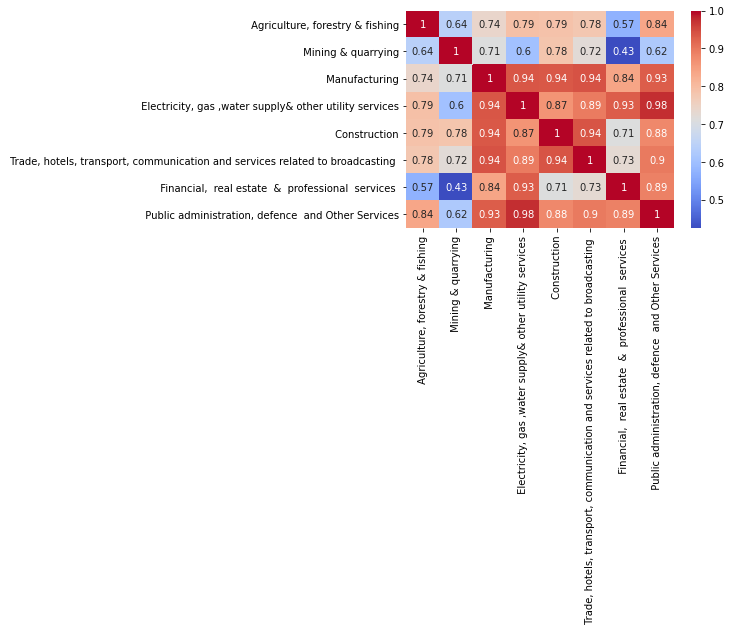

In [9]:
import seaborn as sns
sns.heatmap(df_new.corr(), annot = True,cmap= 'coolwarm')

In [10]:
y = df_new[' Electricity, gas ,water supply& other utility services']
X= df_new.loc[:, df_new.columns != ' Electricity, gas ,water supply& other utility services']

In [11]:
X.head()

,"Agriculture, forestry & fishing",Mining & quarrying,Manufacturing,Construction,"Trade, hotels, transport, communication and services related to broadcasting","Financial, real estate & professional services","Public administration, defence and Other Services"
Date,,,,,,,
2011-12Q1,323221.72,64670.25,350857.05,182218.75,330069.72,395102.00,225668.84
2011-12Q2,270231.38,55462.63,329936.53,189095.78,337631.45,407657.04,263656.97
2011-12Q3,505545.34,65815.18,334726.67,197079.15,351579.17,343064.87,245398.66
2011-12Q4,402948.88,75087.31,394465.31,208940.87,393835.72,385053.47,291257.28
2012-13Q1,360094.46,75789.47,374606.43,203182.41,394347.31,461069.59,263981.77


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)

In [13]:
X_train.shape

(34, 7)

In [14]:
X_test.shape

(9, 7)

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9916887156549102

In [16]:
reg.coef_

array([ 0.02912833, -0.05075074,  0.02206263,  0.02511503,  0.04781577,
        0.06532161, -0.01832771])

In [17]:
reg.intercept_

-11723.175892276893

In [18]:
y_pred = reg.predict(X_test)

In [19]:
reg.score(X_test,y_test)

0.9353132880392323

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("rmse: "+str(rmse))

rmse: 39237188.06470455
